In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project_gova/final_new_features.csv')
df.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,325999,1,0.857131,0.857131,0.999983,0.999983,0.857137,0.857137,0.0,...,21.169828,-11.305044,-37.150649,6.308514,-27.080452,18.484972,67.264467,48.460133,1.327451,24.946161
1,1,85974,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,18.843799,14.288198,-6.700126,29.148113,-23.321211,4.394194,8.594284,33.335841,-14.365679,47.014159
2,2,277216,1,0.999967,0.999967,0.333322,0.333322,0.666656,0.666656,1.0,...,5.097650,-3.538022,-9.421618,6.178239,5.271636,-8.024467,14.330006,17.037134,14.787957,18.480471
3,3,88878,1,0.999967,0.999967,0.999950,0.666644,0.999980,0.833319,1.0,...,-20.446680,-9.133700,-4.813798,1.258837,4.231406,-2.350923,38.373792,5.716316,3.895628,25.379186
4,4,166859,0,0.399992,0.249997,0.599988,0.374995,0.499995,0.312498,0.0,...,-4.984082,8.920693,-8.790442,23.307244,-5.725538,16.558474,88.171982,60.276696,1.099306,14.660433


In [4]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('/content/drive/MyDrive/Project_gova/final_new_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows


In [5]:

def create_connection(db_file):

    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall()
    print(tables[0][0])
    return(len(tables))

In [6]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [ ]:
!cp /content/train.db /content/drive/MyDrive/Project_gova

In [7]:

if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)

        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [8]:
data.head()

,index,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,79310,79308.0,390847,0,0.749981250468738,0.272724793410969,0.499975001249937,0.199996000079998,0.666655555740738,0.249998437509765,...,-24.0221347510815,-10.9308955669403,-15.620143532753,20.6101009929553,42.9791291505098,2.40394094586372,74.2504713535309,35.7658943384886,0.651245266199112,32.5633445978165
1,40830,40828.0,34294,1,0.666655555740738,0.444439506227709,0.499991666805553,0.374995312558593,0.583328472262731,0.368419113583613,...,22.0065489858389,1.5641028881073,-24.2634754595347,49.1362391933799,-34.3688548048958,-14.7318017482758,53.2360532190651,32.6424925085157,5.72119926661253,19.1191797852516
2,5888,5886.0,214310,1,0.499987500312492,0.333327777870369,0.0,0.0,0.249996875039062,0.19999800002,...,4.18030758202076,1.47328647971153,-27.924112290144,15.7741044610739,-8.89979541301727,-13.5100511312485,36.7860618531704,14.5153884515166,-14.1437534689903,-9.92217570543289
3,89508,89506.0,83458,1,0.33332222259258,0.33332222259258,0.999975000624984,0.666655555740738,0.714275510349852,0.454541322351615,...,-6.88518035411835,14.7564660906792,-22.0899581611156,48.7162817716599,-14.0630239844322,9.27580013871193,27.1001061201096,27.2234937548637,6.46548882126808,28.2738001942635
4,17104,17102.0,341711,0,0.29999700003,0.214284183684402,0.14285510206997,0.124998437519531,0.235292733572155,0.173912287337881,...,-7.23446622490883,48.7681278586388,-34.3431435823441,115.413282230496,-12.9716293811798,-58.5754911229014,270.75912322849,14.4977075923234,68.0321181155741,144.823524050415


In [9]:
# remove the first row
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [10]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.666655555740738,0.444439506227709,0.499991666805553,0.374995312558593,0.583328472262731,0.368419113583613,0.0,1.0,7.0,15.5,...,22.0065489858389,1.5641028881073,-24.2634754595347,49.1362391933799,-34.3688548048958,-14.7318017482758,53.2360532190651,32.6424925085157,5.72119926661253,19.1191797852516
2,0.499987500312492,0.333327777870369,0.0,0.0,0.249996875039062,0.19999800002,0.0,0.0,2.0,9.0,...,4.18030758202076,1.47328647971153,-27.924112290144,15.7741044610739,-8.89979541301727,-13.5100511312485,36.7860618531704,14.5153884515166,-14.1437534689903,-9.92217570543289
3,0.33332222259258,0.33332222259258,0.999975000624984,0.666655555740738,0.714275510349852,0.454541322351615,0.0,1.0,4.0,9.0,...,-6.88518035411835,14.7564660906792,-22.0899581611156,48.7162817716599,-14.0630239844322,9.27580013871193,27.1001061201096,27.2234937548637,6.46548882126808,28.2738001942635
4,0.29999700003,0.214284183684402,0.14285510206997,0.124998437519531,0.235292733572155,0.173912287337881,0.0,0.0,6.0,20.0,...,-7.23446622490883,48.7681278586388,-34.3431435823441,115.413282230496,-12.9716293811798,-58.5754911229014,270.75912322849,14.4977075923234,68.0321181155741,144.823524050415
5,0.999900009999,0.499975001249937,0.999950002499875,0.66664444518516,0.999966667777741,0.599988000239995,0.0,1.0,2.0,4.0,...,-1.36301130056381,6.5193042755127,-4.64413034915924,15.8538944125175,-0.962169982492924,4.56615159660578,23.0559525489807,-6.02269744873047,4.63566112518311,8.63339948654175


<h2> 4.2 Converting strings to numerics </h2>

In [42]:
# data.drop(data.index[76321],inplace=True)

In [32]:
# pd.to_numeric(data['cwc_min'])

ValueError: Unable to parse string "cwc_min" at position 76321

In [51]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [49]:
y_true.drop(76322,inplace=True)

In [50]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

In [36]:
data = pd.read_csv('/content/drive/MyDrive/Project_gova/final_string.csv')

In [52]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.666656,0.444440,0.499992,0.374995,0.583328,0.368419,0.0,1.0,7.0,15.5,...,22.006549,1.564103,-24.263475,49.136239,-34.368855,-14.731802,53.236053,32.642493,5.721199,19.119180
2,0.499988,0.333328,0.000000,0.000000,0.249997,0.199998,0.0,0.0,2.0,9.0,...,4.180308,1.473286,-27.924112,15.774104,-8.899795,-13.510051,36.786062,14.515388,-14.143753,-9.922176
3,0.333322,0.333322,0.999975,0.666656,0.714276,0.454541,0.0,1.0,4.0,9.0,...,-6.885180,14.756466,-22.089958,48.716282,-14.063024,9.275800,27.100106,27.223494,6.465489,28.273800
4,0.299997,0.214284,0.142855,0.124998,0.235293,0.173912,0.0,0.0,6.0,20.0,...,-7.234466,48.768128,-34.343144,115.413282,-12.971629,-58.575491,270.759123,14.497708,68.032118,144.823524
5,0.999900,0.499975,0.999950,0.666644,0.999967,0.599988,0.0,1.0,2.0,4.0,...,-1.363011,6.519304,-4.644130,15.853894,-0.962170,4.566152,23.055953,-6.022697,4.635661,8.633399


In [61]:
data.columns

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       ...
       '86_y', '87_y', '88_y', '89_y', '90_y', '91_y', '92_y', '93_y', '94_y',
       '95_y'],
      dtype='object', length=218)

In [ ]:
# data.to_csv('/content/drive/MyDrive/Project_gova/final_string.csv')

<h2> 4.3 Random train test split( 70:30) </h2>

In [53]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [54]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (69999, 218)
Number of data points in test data : (30000, 218)


In [55]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6306804382919756 Class 1:  0.3693195617080244
---------- Distribution of output variable in train data ----------
Class 0:  0.36933333333333335 Class 1:  0.36933333333333335


In [56]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)


    B =(C/C.sum(axis=0))

    plt.figure(figsize=(20,4))

    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8800217196396074


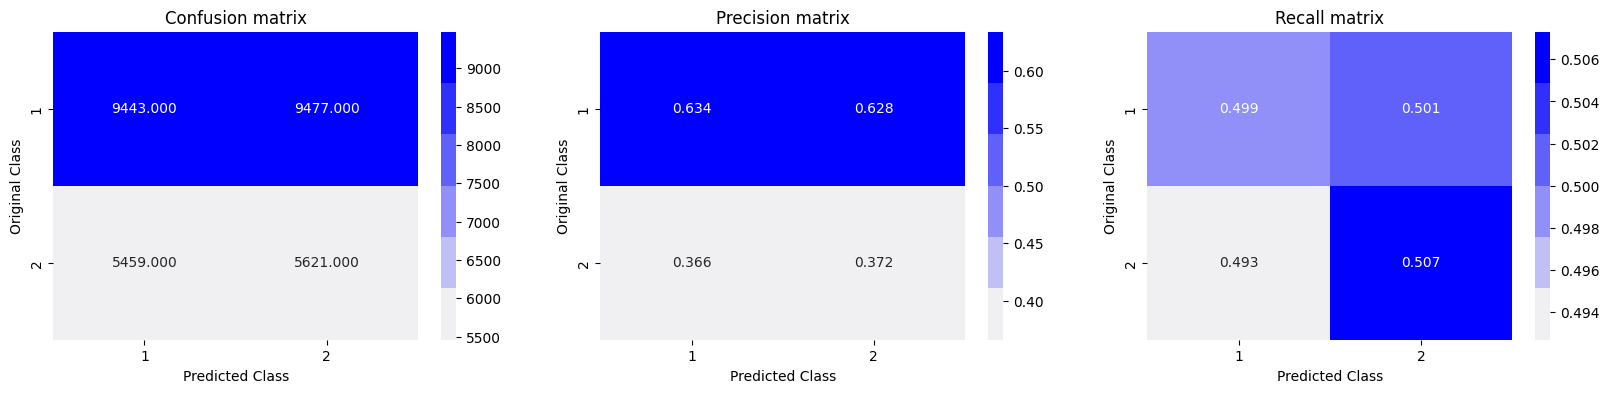

In [57]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

0.01
For values of best alpha =  0.01 The train log loss is: 0.4638764350537481
For values of best alpha =  0.01 The test log loss is: 0.4684426205017666
Total number of data points : 30000


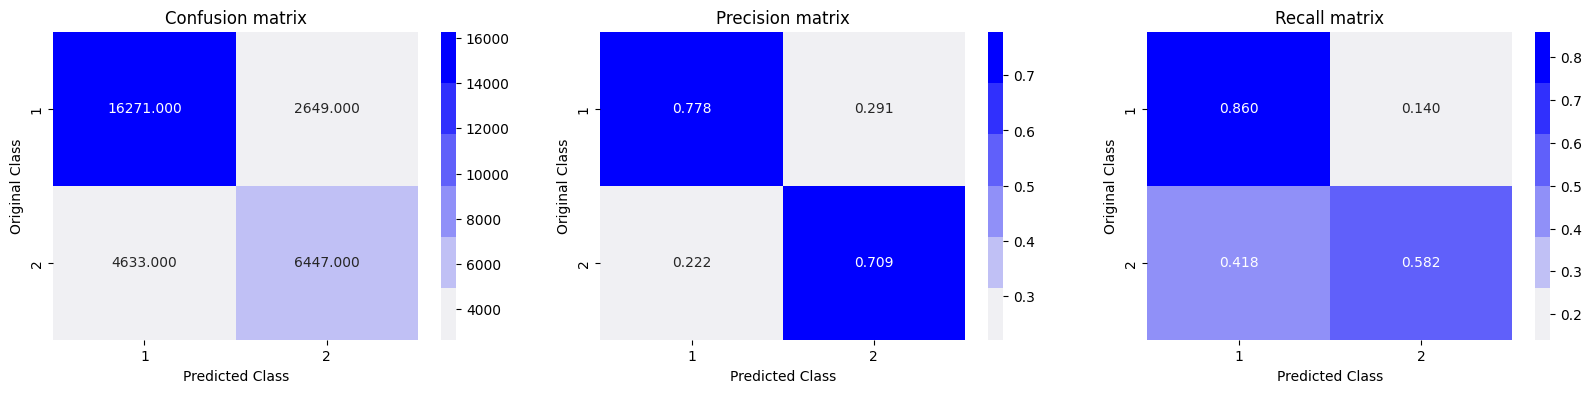

In [60]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


# # default parameters
# # SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# # shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# # class_weight=None, warm_start=False, average=False, n_iter=None)




# log_error_array=[]
# for i in alpha:
#     clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
#     clf.fit(X_train, y_train)
#     sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#     sig_clf.fit(X_train, y_train)
#     predict_y = sig_clf.predict_proba(X_test)
#     log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
#     print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

# fig, ax = plt.subplots()
# ax.plot(alpha, log_error_array,c='g')
# for i, txt in enumerate(np.round(log_error_array,3)):
#     ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
# plt.grid()
# plt.title("Cross Validation Error for each alpha")
# plt.xlabel("Alpha i's")
# plt.ylabel("Error measure")
# plt.show()


# best_alpha = np.argmin(log_error_array)#0.01
best_alpha = 3
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)




log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)#1e-05
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [77]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.65192	valid-logloss:0.65197
[10]	train-logloss:0.59693	valid-logloss:0.59739
[20]	train-logloss:0.55676	valid-logloss:0.55768
[30]	train-logloss:0.52703	valid-logloss:0.52837
[40]	train-logloss:0.50396	valid-logloss:0.50558
[50]	train-logloss:0.48571	valid-logloss:0.48748
[60]	train-logloss:0.47143	valid-logloss:0.47337
[70]	train-logloss:0.45984	valid-logloss:0.46197
[80]	train-logloss:0.45043	valid-logloss:0.45265
[90]	train-logloss:0.44264	valid-logloss:0.44499
[100]	train-logloss:0.43633	valid-logloss:0.43879
[110]	train-logloss:0.43093	valid-logloss:0.43348
[120]	train-logloss:0.42596	valid-logloss:0.42868
[130]	train-logloss:0.42198	valid-logloss:0.42483
[140]	train-logloss:0.41863	valid-logloss:0.42165
[150]	train-logloss:0.41578	valid-logloss:0.41897
[160]	train-logloss:0.41306	valid-logloss:0.41645
[170]	train-logloss:0.41068	valid-logloss:0.41424
[180]	train-logloss:0.40848	valid-logloss:0.41222
[190]	train-logloss:0.40634	valid-logloss:0.41024
[200]	train

Total number of data points : 30000


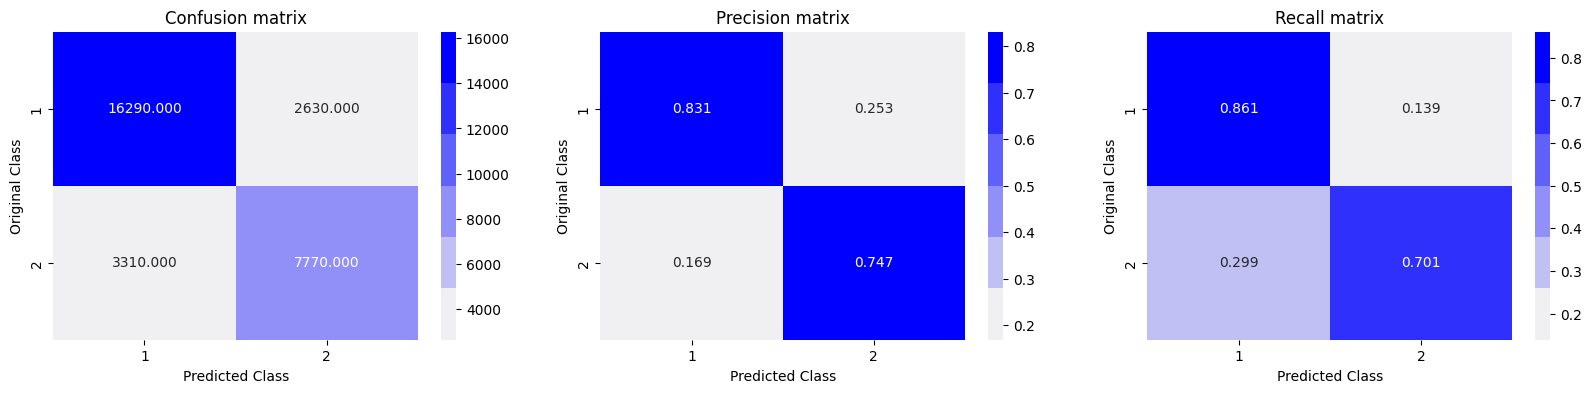

In [79]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [62]:
external = pd.read_csv('/content/drive/MyDrive/Project_gova/external_final_features_test.csv')

In [63]:
external.head()

,Unnamed: 0,id,freq_qid1_x,freq_qid2_x,q1len_x,q2len_x,q1_n_words_x,q2_n_words_x,word_Common_x,word_Total_x,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,1,1,1,30,38,5,5,3.0,10.0,...,-1.225697,9.330784,1.954323,78.951339,24.946464,-21.663014,49.338879,29.904553,-31.689559,6.202816


In [64]:
external.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [65]:
cols = list(external.columns)
for i in cols:
    external[i] = external[i].apply(pd.to_numeric)
    print(i)

freq_qid1_x
freq_qid2_x
q1len_x
q2len_x
q1_n_words_x
q2_n_words_x
word_Common_x
word_Total_x
word_share_x
freq_q1+q2_x
freq_q1-q2_x
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1_y
freq_qid2_y
q1len_y
q2len_y
q1_n_words_y
q2_n_words_y
word_Common_y
word_Total_y
word_share_y
freq_q1+q2_y
freq_q1-q2_y
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y


In [66]:
external.head()

,freq_qid1_x,freq_qid2_x,q1len_x,q2len_x,q1_n_words_x,q2_n_words_x,word_Common_x,word_Total_x,word_share_x,freq_q1+q2_x,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,1,1,30,38,5,5,3.0,10.0,0.3,2,...,-1.225697,9.330784,1.954323,78.951339,24.946464,-21.663014,49.338879,29.904553,-31.689559,6.202816


In [67]:
data.columns

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       ...
       '86_y', '87_y', '88_y', '89_y', '90_y', '91_y', '92_y', '93_y', '94_y',
       '95_y'],
      dtype='object', length=218)

In [68]:
dup_y = ["freq_qid1_y",
"freq_qid2_y",
"q1len_y",
"q2len_y",
"q1_n_words_y",
"q2_n_words_y",
"word_Common_y",
"word_Total_y",
"word_share_y",
"freq_q1+q2_y",
"freq_q1-q2_y"]

In [69]:
dup_x = ["freq_qid1_x",
"freq_qid2_x",
"q1len_x",
"q2len_x",
"q1_n_words_x",
"q2_n_words_x",
"word_Common_x",
"word_Total_x",
"word_share_x",
"freq_q1+q2_x",
"freq_q1-q2_x"]

In [71]:
co = [
    "freq_qid1",
"freq_qid2",
"q1len",
"q2len",
"q1_n_words",
"q2_n_words",
"word_Common",
"word_Total",
"word_share",
"freq_q1+q2",
"freq_q1-q2"

]

In [72]:
rem = {k:v for k,v in zip(dup_x,co)}
rem

{'freq_qid1_x': 'freq_qid1',
 'freq_qid2_x': 'freq_qid2',
 'q1len_x': 'q1len',
 'q2len_x': 'q2len',
 'q1_n_words_x': 'q1_n_words',
 'q2_n_words_x': 'q2_n_words',
 'word_Common_x': 'word_Common',
 'word_Total_x': 'word_Total',
 'word_share_x': 'word_share',
 'freq_q1+q2_x': 'freq_q1+q2',
 'freq_q1-q2_x': 'freq_q1-q2'}

In [73]:
external.drop(dup_y,axis=1,inplace=True)

In [74]:
external.rename(columns=rem, inplace=True)

In [75]:
external = external.loc[:,data.columns]
external

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.666644,0.499988,0.9999,0.499975,0.599988,0.599988,1,0,0,5.0,...,-1.225697,9.330784,1.954323,78.951339,24.946464,-21.663014,49.338879,29.904553,-31.689559,6.202816


In [76]:
sig_clf.predict_proba(external)

array([[0.60289235, 0.39710765]])

In [78]:

d_external = xgb.DMatrix(external)
predict_external = bst.predict(d_external)
print(predict_external>0.5)

[False]


In [ ]:
data.columns

In [ ]:
external.columns